<a href="https://www.kaggle.com/dokker19/simple-classic-cnn-with-fashion-mnist-dataset?scriptVersionId=89956125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(f"Shape of X_train:{X_train.shape} y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} y_test: {y_test.shape}")
print(f"Values in y_train: {np.unique(y_train, return_counts=True)}")

Shape of X_train:(60000, 28, 28) y_train: (60000,)
Shape of X_test: (10000, 28, 28) y_test: (10000,)
Values in y_train: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


### visualizing some images

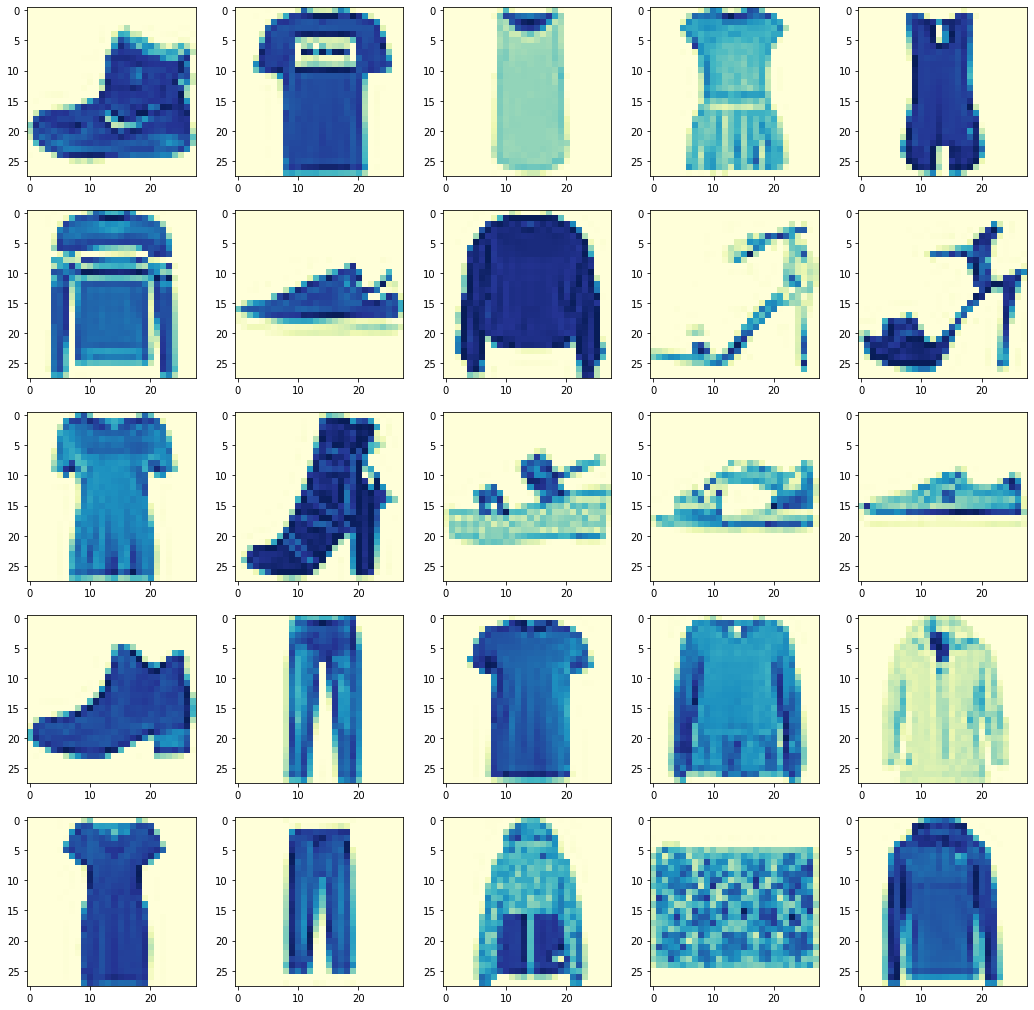

In [3]:
f, ax = plt.subplots(5, 5, figsize=(18, 18))
for i in range(25):
    ax[int(i/5)][i%5].imshow(X_train[i], cmap='YlGnBu')
    
plt.show()

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## First model

In [6]:
CNN_1 = keras.Sequential()
CNN_1.add(keras.layers.Conv2D(10, kernel_size=3, activation='relu', padding='same',
                             input_shape=(28, 28, 1)))
CNN_1.add(keras.layers.MaxPooling2D(2))
CNN_1.add(keras.layers.Conv2D(20, kernel_size=3, activation='relu', padding='same'))
CNN_1.add(keras.layers.MaxPooling2D(2))
CNN_1.add(keras.layers.Flatten())
CNN_1.add(keras.layers.Dense(10, activation='softmax'))

CNN_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 980)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                9810      
Total params: 11,730
Trainable params: 11,730
Non-trainable params: 0
____________________________________________________

2022-03-13 03:13:00.773230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:13:00.873838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:13:00.874607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:13:00.876005: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
CNN_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN1.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history1 = CNN_1.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), 
                     callbacks=[checkpoint_cb, early_stopping_cb])

2022-03-13 03:13:03.907106: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-03-13 03:13:05.316649: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1500/1500 [==============================] - 11s 3ms/step - loss: 0.5279 - accuracy: 0.8137 - val_loss: 0.3685 - val_accuracy: 0.8701
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3592 - accuracy: 0.8725 - val_loss: 0.3641 - val_accuracy: 0.8733
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3231 - accuracy: 0.8856 - val_loss: 0.3096 - val_accuracy: 0.8874
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2988 - accuracy: 0.8947 - val_loss: 0.2972 - val_accuracy: 0.8947
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2822 - accuracy: 0.8993 - val_loss: 0.2818 - val_accuracy: 0.8990
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9048 - val_loss: 0.2808 - val_accuracy: 0.8982
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2552 - accuracy: 0.9086 - val_loss: 0.2692 - val_accuracy: 0.9024
Ep

In [8]:
CNN_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.9047


[0.2798606753349304, 0.904699981212616]

### Hyperparameter tuning using keras tuner

In [9]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Choice('layer_1_units', [8, 16, 32]),
                                 kernel_size=hp.Choice('layer_1_kernel', [3, 5]),
                                 activation='relu', padding='same',
                                 input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Conv2D(filters=hp.Choice('layer_2_units', [16, 32, 64, 128]),
                                 kernel_size=hp.Choice('layer_2_kernel', [3, 5]),
                                 activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='sparse_categorical_crossentropy', metrics='accuracy')
    
    return model

In [10]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=15,
                    executions_per_trial=1, directory='test_3', overwrite=True)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
tuner.results_summary()

Trial 15 Complete [00h 00m 41s]
val_accuracy: 0.9125833511352539

Best val_accuracy So Far: 0.9125833511352539
Total elapsed time: 00h 08m 37s
Results summary
Results in test_3/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layer_1_units: 32
layer_1_kernel: 5
layer_2_units: 128
layer_2_kernel: 3
learning_rate: 0.001
Score: 0.9125833511352539
Trial summary
Hyperparameters:
layer_1_units: 32
layer_1_kernel: 3
layer_2_units: 32
layer_2_kernel: 5
learning_rate: 0.001
Score: 0.9122499823570251
Trial summary
Hyperparameters:
layer_1_units: 16
layer_1_kernel: 3
layer_2_units: 64
layer_2_kernel: 3
learning_rate: 0.001
Score: 0.9120833277702332
Trial summary
Hyperparameters:
layer_1_units: 16
layer_1_kernel: 5
layer_2_units: 64
layer_2_kernel: 3
learning_rate: 0.001
Score: 0.9087499976158142
Trial summary
Hyperparameters:
layer_1_units: 8
layer_1_kernel: 5
layer_2_units: 64
layer_2_kernel: 5
learning_rate: 0.001
Score: 0.90

In [11]:
models = tuner.get_best_models(num_models=2)
best_model=models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 100,554
Trainable params: 100,554
Non-trainable params: 0
__________________________________________________

In [12]:
history_2 = best_model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), 
                           epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2049 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1822 - accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1622 - accuracy: 0.9399
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9467
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1303 - accuracy: 0.9527
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1159 - accuracy: 0.9573
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9628
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0951 - accuracy: 0.9664
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9687
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.077

In [13]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.9139


[0.341730535030365, 0.9139000177383423]

### Model is clearly overfit (98% vs 91.6%) so adding a dropout layer

In [14]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 100,554
Trainable params: 100,554
Non-trainable params: 0
__________________________________________________

In [15]:
third_model = keras.Sequential()
third_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                             input_shape=(28, 28, 1)))
third_model.add(keras.layers.MaxPooling2D(2))
third_model.add(keras.layers.Conv2D(128, kernel_size=5, activation='relu', padding='same'))
third_model.add(keras.layers.MaxPooling2D(2))
third_model.add(keras.layers.Flatten())
third_model.add(keras.layers.Dense(100, activation='relu'))
third_model.add(keras.layers.Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
third_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
third_model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3900 - accuracy: 0.8593
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.9081
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2036 - accuracy: 0.9253
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1715 - accuracy: 0.9361


In [17]:
result = third_model.evaluate(X_test, y_test)
print(f"final accuracy: {result[1]:.2f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2305 - accuracy: 0.9183
final accuracy: 0.92


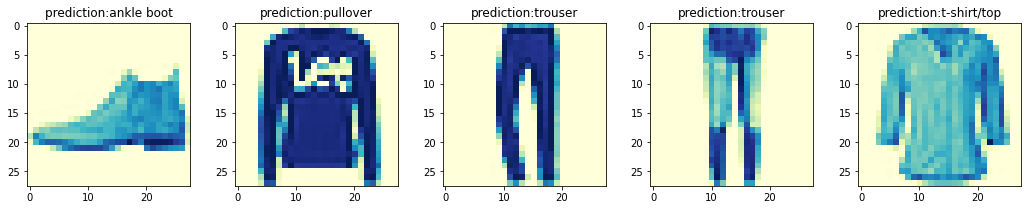

In [18]:
label = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

f, ax = plt.subplots(1, 5, figsize=(18, 3))
for i in range(5):
    ax[i].imshow(X_test[i], cmap='YlGnBu')
    ax[i].set_title("prediction:{}".format(label[np.argmax(third_model.predict(X_test[i].reshape(-1, 28, 28, 1)))]))